In [108]:
import scipy as sp
import numpy as np
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from empiricaldist import Pmf

plt.style.use('seaborn-dark-palette')

In [141]:
a = np.random.normal(0, 1, 1000)
b = np.random.normal(0, 1, 1000) + 2.5

In [142]:
data = pd.DataFrame({'A': a, 'B': b})

(array([ 32.,  77., 177., 221., 242., 165.,  60.,  22.,   3.,   1.]),
 array([-2.52683935, -1.88992429, -1.25300923, -0.61609417,  0.02082088,
         0.65773594,  1.294651  ,  1.93156606,  2.56848112,  3.20539618,
         3.84231124]),
 <BarContainer object of 10 artists>)

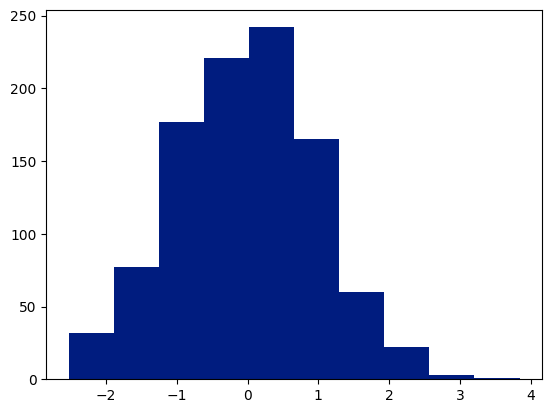

In [147]:
plt.hist(a)

### Bayesian A/B

In [143]:
A = data['A']
B = data['B']
A = Pmf(A,np.linspace(-1,4,1000))
B = Pmf(B,np.linspace(-1,4,1000))

In [144]:
exp = sp.stats.expon.rvs(size = 1000)
likelihood = Pmf(exp,np.linspace(-1,4,1000))

<AxesSubplot:ylabel='Density'>

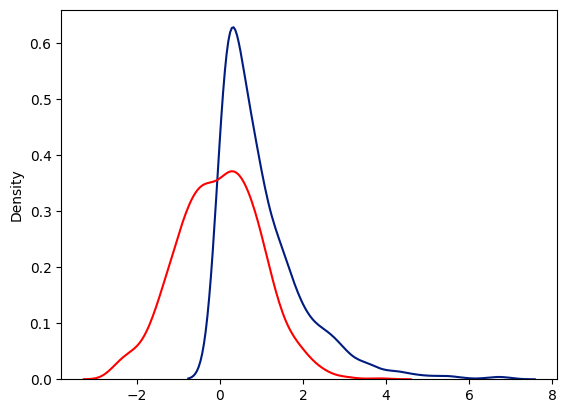

In [153]:
sns.kdeplot(likelihood)
sns.kdeplot(a,color = 'r')

<AxesSubplot:ylabel='Density'>

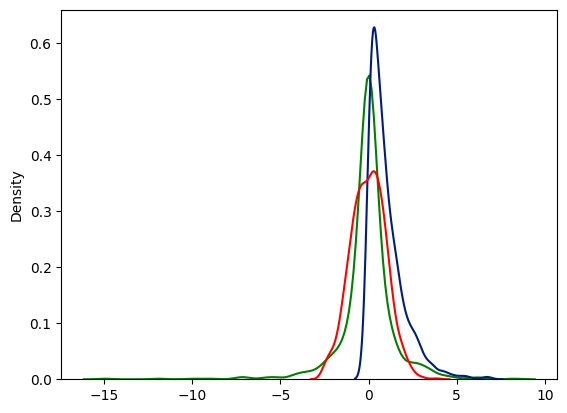

In [155]:
posterior = a * likelihood
sns.kdeplot(posterior, color = 'g')
sns.kdeplot(likelihood)
sns.kdeplot(a,color = 'r')

In [126]:
A_posterior = A * likelihood
B_posterior = B * likelihood

A_posterior.normalize()
A_posterior.normalize()

1.0

(array([999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  1.21588087,  2.43176174,  3.64764262,  4.86352349,
         6.07940436,  7.29528523,  8.5111661 ,  9.72704697, 10.94292785,
        12.15880872]),
 <BarContainer object of 10 artists>)

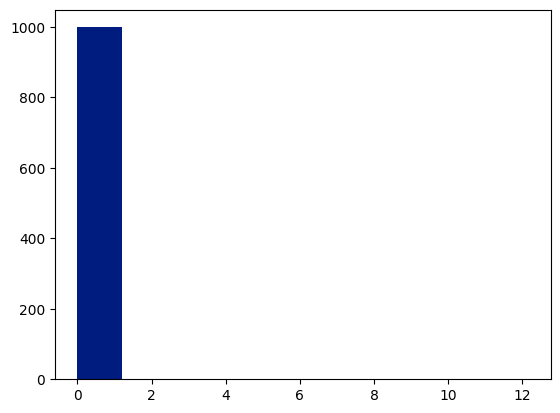

In [131]:
plt.hist(B_posterior)

<AxesSubplot:>

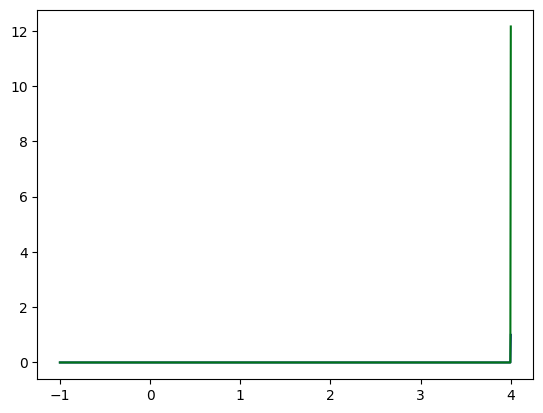

In [130]:
A_posterior.plot(label='A')
B_posterior.plot(label='B')

In [116]:
def bayes_AB(data , prior):
    A = data['A']
    B = data['B']
    A = Pmf(A,np.linspace(-1,1,1000))
    B = Pmf(B,np.linspace(-1,1,1000))
    
    likelihood =  A / B
    posterior = prior * likelihood
    return posterior

### Frequentist A/B

In [117]:
def ttest(data,ispaired = True, istwosided = False): 
    return pg.ttest(data['A'], data['B'], paired=ispaired)

In [118]:
def plot_distri(data):
    sns.distplot(data['A'], label='A')
    sns.distplot(data['B'], label='B')
    plt.xlabel('value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

c:\Users\ja\anaconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ja\anaconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


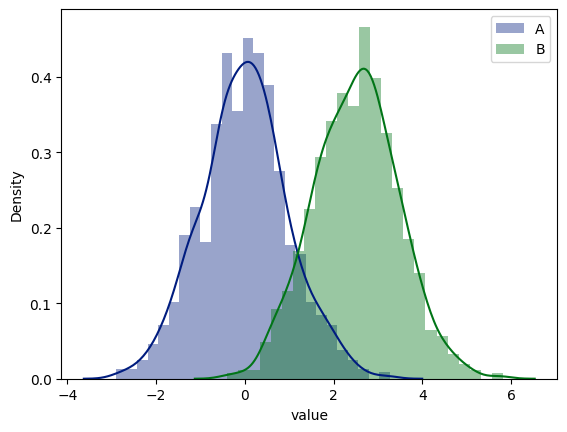

In [119]:
plot_distri(data)

In [120]:
ttest(data)

c:\Users\ja\anaconda3\envs\data_science\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: overflow encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-57.230151,999,two-sided,1.336959e-317,"[-2.6, -2.43]",2.601287,inf,1.0
